In [544]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression,ElasticNet
#from sklearn.svm import SVR
#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.metrics import r2_score,mean_absolute_error
import math
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
#from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sklm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings("ignore")

In [545]:
frame=pd.read_excel("COVID-19.xlsx")
frame.drop(["geoId","day","month","year","countryterritoryCode","continentExp","Unnamed: 11","Unnamed: 12"],axis=1,inplace=True)
frame.columns=[["Date","Confirmed","Deaths","Country","Population"]]
frame.drop("Population",axis=1,inplace=True)
frame.columns = frame.columns.get_level_values(0)
frame["Date"]=pd.to_datetime(frame["Date"],format="%d/%m/%Y")
frame.head()


,Date,Confirmed,Deaths,Country
0,2020-05-05,190,5,Afghanistan
1,2020-05-04,235,13,Afghanistan
2,2020-05-03,134,4,Afghanistan
3,2020-05-02,164,4,Afghanistan
4,2020-05-01,222,4,Afghanistan


In [546]:
frame.dtypes


Date         datetime64[ns]
Confirmed             int64
Deaths                int64
Country              object
dtype: object

In [547]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15074 entries, 0 to 15073
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15074 non-null  datetime64[ns]
 1   Confirmed  15074 non-null  int64         
 2   Deaths     15074 non-null  int64         
 3   Country    15074 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 471.2+ KB


In [548]:
frame=frame.sort_values(by=["Country","Date"])
frame.head()

,Date,Confirmed,Deaths,Country
116,2019-12-31,0,0,Afghanistan
115,2020-01-01,0,0,Afghanistan
114,2020-01-02,0,0,Afghanistan
113,2020-01-03,0,0,Afghanistan
112,2020-01-04,0,0,Afghanistan


In [549]:
frame["Total_Confirmed"]=frame.groupby("Country")["Confirmed"].cumsum()
frame["Total_Deaths"]=frame.groupby("Country")["Deaths"].cumsum()



In [550]:
df_Bangladesh=frame[frame["Country"]=="Bangladesh"]
df_world=frame[frame["Country"]!="Bangladesh"]

In [551]:
df_Bangladesh.tail()

,Date,Confirmed,Deaths,Country,Total_Confirmed,Total_Deaths
1257,2020-05-01,571,5,Bangladesh,8238,168
1256,2020-05-02,552,2,Bangladesh,8790,170
1255,2020-05-03,665,5,Bangladesh,9455,175
1254,2020-05-04,688,2,Bangladesh,10143,177
1253,2020-05-05,786,5,Bangladesh,10929,182


In [552]:
df_world=df_world[df_world["Total_Confirmed"]>0]

In [553]:
df_world['Days'] = (df_world['Date'] - df_world.groupby('Country')['Date'].transform('first'))
df_Bangladesh['Days'] = (df_Bangladesh['Date'] - df_Bangladesh.groupby('Country')['Date'].transform('first'))

In [554]:
df_Bangladesh.head()

,Date,Confirmed,Deaths,Country,Total_Confirmed,Total_Deaths,Days
1304,2020-03-09,3,0,Bangladesh,3,0,0 days
1303,2020-03-15,0,0,Bangladesh,3,0,6 days
1302,2020-03-17,2,0,Bangladesh,5,0,8 days
1301,2020-03-18,3,0,Bangladesh,8,0,9 days
1300,2020-03-19,2,0,Bangladesh,10,0,10 days


In [555]:
a=df_world["Country"].unique()

In [556]:
df_world["Days"]=df_world["Days"].astype(str)
df_Bangladesh["Days"]=df_Bangladesh["Days"].astype(str)
df_world["Days"] = df_world["Days"].str.split(' ').str[0]
df_Bangladesh["Days"] = df_Bangladesh["Days"].str.split(' ').str[0]
df_world["Days"]=df_world["Days"].astype(int)
df_Bangladesh["Days"]=df_Bangladesh["Days"].astype(int)
df_world["Days"]=df_world["Days"]+1
df_Bangladesh["Days"]=df_Bangladesh["Days"]+1

In [557]:
df_USA=df_world[df_world["Country"]=="United_States_of_America"]
df_USA=df_USA[["Days","Total_Confirmed"]]
df_UK=df_world[df_world["Country"]=="United_Kingdom"]
df_UK=df_UK[["Days","Total_Confirmed"]]
df_Italy=df_world[df_world["Country"]=="Italy"]
df_Italy=df_Italy[["Days","Total_Confirmed"]]
df_Spain=df_world[df_world["Country"]=="Spain"]
df_Spain=df_Spain[["Days","Total_Confirmed"]]
df_France=df_world[df_world["Country"]=="France"]
df_France=df_France[["Days","Total_Confirmed"]]

df_India=df_world[df_world["Country"]=="India"]
df_India=df_India[["Days","Total_Confirmed"]]
df_Pakistan=df_world[df_world["Country"]=="Pakistan"]
df_Pakistan=df_Pakistan[["Days","Total_Confirmed"]]
df_Bangladesh=df_Bangladesh[["Days","Total_Confirmed"]]

In [558]:
df_Bangladesh=df_Bangladesh.set_index("Days")
df_Bangladesh.head()


,Total_Confirmed
Days,
1,3
7,3
9,5
10,8
11,10


In [559]:
import plotly.express as px

fig = px.line(df_Bangladesh,x=df_Bangladesh.index,y="Total_Confirmed" ,title='Total_Confirmed casec by day')
fig.show()

In [560]:
df_Bangladesh.shape

(52, 1)

In [561]:
train,test=train_test_split(df_Bangladesh,test_size=0.2,shuffle=False)

In [562]:
train.shape

(41, 1)

In [563]:
test.shape

(11, 1)

In [564]:
import plotly.express as px

fig = px.line(train,x=train.index,y="Total_Confirmed" ,title='Total_Confirmed casec by day')
fig.show()

In [565]:
import plotly.express as px

fig = px.line(test,x=test.index,y="Total_Confirmed" ,title='Total_Confirmed casec by day')
fig.show()

In [566]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

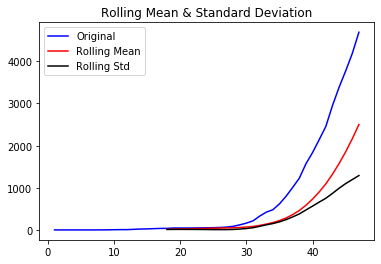

Results of Dickey-Fuller Test:
Test Statistic                  0.629558
p-value                         0.988322
#Lags Used                     10.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [567]:
test_stationarity(train["Total_Confirmed"])

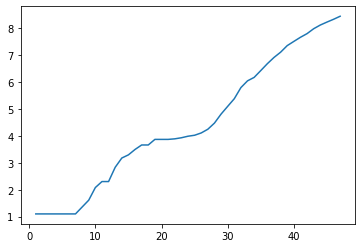

In [568]:
ts_log_train = np.log(train)
plt.plot(ts_log_train)

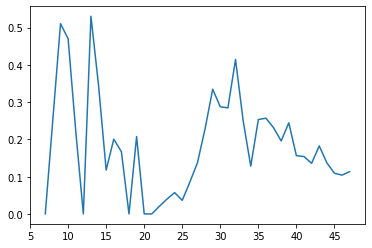

In [569]:
ts_log_diff_train = ts_log_train - ts_log_train.shift(1)
plt.plot(ts_log_diff_train)

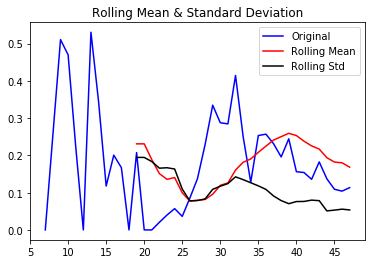

Results of Dickey-Fuller Test:
Test Statistic                 -3.634391
p-value                         0.005137
#Lags Used                      1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [570]:
ts_log_diff_train.dropna(inplace=True)
test_stationarity(ts_log_diff_train["Total_Confirmed"])

In [571]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [572]:
lag_acf_train = acf(ts_log_diff_train, nlags=10)
lag_pacf_train = pacf(ts_log_diff_train, nlags=10, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

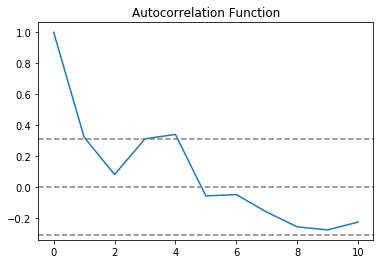

In [573]:
#Plot ACF: 
plt.Figure(figsize=(2,3))
plt.plot(lag_acf_train)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_train)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [574]:
test.shape

(11, 1)

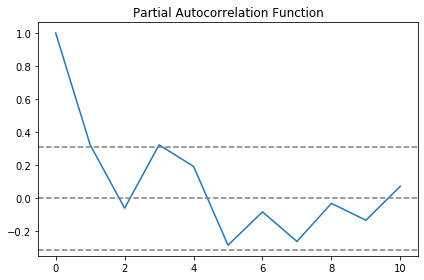

In [575]:
#Plot PACF:
plt.plot(lag_pacf_train)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff_train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff_train)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [576]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

Text(0.5, 1.0, 'RSS: 0.6749155247751284')

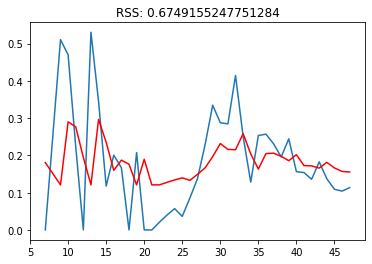

In [599]:
model = ARIMA(ts_log_train, order=(1,1,0))
results_ARIMA = model.fit(disp=0)  
plt.plot(ts_log_diff_train)
plt.plot(results_ARIMA.fittedvalues, color='red')
a=sum((results_ARIMA.fittedvalues-ts_log_diff_train["Total_Confirmed"])**2)
plt.title('RSS: '+str(a))
#predicted=ARIMAResults.forecast(results_ARIMA,steps=30)[0]



In [600]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.Total_Confirmed   No. Observations:                   40
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  24.932
Method:                       css-mle   S.D. of innovations              0.130
Date:                Wed, 06 May 2020   AIC                            -43.864
Time:                        23:36:15   BIC                            -38.797
Sample:                             1   HQIC                           -42.032
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1808      0.030      5.961      0.000       0.121       0.240
ar.L1.D.Total_Confirmed     0.3313      0.151      2.196      0.028       0.036       0.627
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.0182           +0.0000j            3.0182            0.0000
-----------------------------------------------------------------------------
"""

In [601]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Days
7     0.180786
9     0.120887
10    0.290137
11    0.276611
12    0.194820
dtype: float64


In [602]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Days
7     0.180786
9     0.301672
10    0.591809
11    0.868421
12    1.063241
dtype: float64

In [603]:
predictions_ARIMA_log = pd.Series(ts_log_train.iat[1,0], index=ts_log_train.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()


Days
1     1.098612
7     1.279398
9     1.400285
10    1.690421
11    1.967033
dtype: float64

In [604]:
df_Bangladesh.reset_index(inplace=True)
train.reset_index(inplace = True)
test.reset_index(inplace = True)

In [616]:
2**3

8

In [618]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))
def expo_model(x,p,N0=3,X0=1):
    return N0*(1+p)**(x-X0)
def gompertz_model(x,a,b,c):
    return c*np.exp(-b*np.exp(-x/a)) 
def bertalanffy_model(x,a,b,c,X0=1):
    return (c*(1-np.exp(-a*(x-X0))))**b

In [620]:
turn_off_Gomp = True
x = np.array(list(train['Days'].values))
y = np.array(list(train['Total_Confirmed'].values))

y0 = y[0]
yf = y[-1]
print("Initial number of cases: ", y0)
print("Current number of cases: ", yf)

print('>>>')
print('>>> ARIMA Model')

predicted=ARIMAResults.forecast(results_ARIMA,steps=11)[0]
predicted=np.exp(predicted)
predicted=predicted.astype(int)
test_case_ARIMA={"Days":test.Days,"Total_Confirmed":predicted}
test_case_ARIMA=pd.DataFrame(test_case_ARIMA)
MSLE=sklm.mean_squared_log_error(test["Total_Confirmed"],predicted)
print("Mean squared log error (MSLE): ", '{:.3f}'.format(MSLE))
print("Exp of RMSLE: ", '{:.3f}'.format(np.exp(np.sqrt(MSLE))))
print("R2 score: ", '{:.3f}'.format(sklm.r2_score(test["Total_Confirmed"],predicted)))
RMSE=np.sqrt(sum((predicted-test["Total_Confirmed"])**2))
print("RMSE score: ", '{:.3f}'.format(RMSE))


print('>>>')
print('>>> Logistic Model')
fit_i = curve_fit(logistic_model,x,y,p0=[3,50,100000])#, bounds=([0,0,0],[10,100,150000]))
ai,bi,ci = fit_i[0]
sigma_ai, sigma_bi, sigma_ci = np.sqrt(np.diag(fit_i[1]))

print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('a','b','c'),(ai,bi,ci))])
print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('sigma_a','sigma_b','sigma_c'),(sigma_ai,sigma_bi,sigma_ci))])

y_pred_logistic = logistic_model(test["Days"],ai,bi,ci)

pred_upper_logistic=logistic_model(test["Days"],ai+sigma_ai,bi+sigma_bi,ci+sigma_ci)
pred_lower_logistic=logistic_model(test["Days"],ai-sigma_ai,bi-sigma_bi,ci-sigma_ci)

test_case_logistic={"Days":test.Days,"Total_Confirmed":y_pred_logistic}
MSLE=sklm.mean_squared_log_error(test["Total_Confirmed"],y_pred_logistic)
print("Mean squared log error (MSLE): ", '{:.3f}'.format(MSLE))
print("Exp of RMSLE: ", '{:.3f}'.format(np.exp(np.sqrt(MSLE))))
print("R2 score: ", '{:.3f}'.format(sklm.r2_score(test["Total_Confirmed"],y_pred_logistic)))
RMSE=np.sqrt(sum((y_pred_logistic-test["Total_Confirmed"])**2))
print("RMSE score: ", '{:.3f}'.format(RMSE))




print('***')
print('*** Gompertz Model')
ini_guess = [1,10,ci]  ##take initial guess from result of Logistic model
fit_i = curve_fit(gompertz_model,x,y,p0=ini_guess)    
ai,bi,ci = fit_i[0]
sigma_ai, sigma_bi, sigma_ci = np.sqrt(np.diag(fit_i[1]))

print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('a','b','c'),(ai,bi,ci))])
print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('sigma_a','sigma_b','sigma_c'),(sigma_ai,sigma_bi,sigma_ci))])

y_pred_gompertz = gompertz_model(test["Days"],ai,bi,ci)
    
pred_upper_gompertz=gompertz_model(test["Days"],ai+sigma_ai,bi+sigma_bi,ci+sigma_ci)
pred_lower_gompertz=gompertz_model(test["Days"],ai-sigma_ai,bi-sigma_bi,ci-sigma_ci)

test_case_gompertz={"Days":test.Days,"Total_Confirmed":y_pred_gompertz}
MSLE=sklm.mean_squared_log_error(test["Total_Confirmed"],y_pred_gompertz)
print("Mean squared log error (MSLE): ", '{:.3f}'.format(MSLE))
print("Exp of RMSLE: ", '{:.3f}'.format(np.exp(np.sqrt(MSLE))))
print("R2 score: ", '{:.3f}'.format(sklm.r2_score(test["Total_Confirmed"],y_pred_gompertz)))
RMSE=np.sqrt(sum((y_pred_gompertz-test["Total_Confirmed"])**2))
print("RMSE score: ", '{:.3f}'.format(RMSE))
  
    
    
print('***')
print('*** bertalanffy Model')
ini_guess = [1,10,ci]  ##take initial guess from result of Logistic model
fit_i = curve_fit(bertalanffy_model,x,y,p0=ini_guess,maxfev = 10000)    
ai,bi,ci = fit_i[0]
sigma_ai, sigma_bi, sigma_ci = np.sqrt(np.diag(fit_i[1]))

print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('a','b','c'),(ai,bi,ci))])
print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('sigma_a','sigma_b','sigma_c'),(sigma_ai,sigma_bi,sigma_ci))])

y_pred_bertalanffy= bertalanffy_model(test["Days"],ai,bi,ci)
    
pred_upper_bertalanffy=bertalanffy_model(test["Days"],ai+sigma_ai,bi+sigma_bi,ci+sigma_ci)
pred_lower_bertalanffy=bertalanffy_model(test["Days"],ai-sigma_ai,bi-sigma_bi,ci-sigma_ci)

test_case_bertalanffy={"Days":test.Days,"Total_Confirmed":y_pred_bertalanffy}
MSLE=sklm.mean_squared_log_error(test["Total_Confirmed"],y_pred_bertalanffy)
print("Mean squared log error (MSLE): ", '{:.3f}'.format(MSLE))
print("Exp of RMSLE: ", '{:.3f}'.format(np.exp(np.sqrt(MSLE))))
print("R2 score: ", '{:.3f}'.format(sklm.r2_score(test["Total_Confirmed"],y_pred_bertalanffy)))
RMSE=np.sqrt(sum((y_pred_bertalanffy-test["Total_Confirmed"])**2))
print("RMSE score: ", '{:.3f}'.format(RMSE))


print('###')
print('### Exponential Model')
fit_exp = curve_fit((lambda tt,pp: expo_model(tt,pp,N0=y0)),x,y,p0=[0.10])  ##Take N0 from initial number of reported cases
pi, sigma_pi = fit_exp[0][0], np.sqrt(fit_exp[1]).flatten()[0]

print([ss+'='+'{:.3f}'.format(xx) for ss, xx in zip(('p','sigma_p'),(pi,sigma_pi))])

y_pred_expo = expo_model(test["Days"],pi)

pred_upper_expo=expo_model(test["Days"],pi+sigma_pi)
pred_lower_expo=expo_model(test["Days"],pi-sigma_pi)

test_case_expo={"Days":test.Days,"Total_Confirmed":y_pred_expo}
MSLE=sklm.mean_squared_log_error(test["Total_Confirmed"],y_pred_expo)
print("Mean squared log error (MSLE): ", '{:.3f}'.format(MSLE))
print("Exp of RMSLE: ", '{:.3f}'.format(np.exp(np.sqrt(MSLE))))
print("R2 score: ", '{:.3f}'.format(sklm.r2_score(test["Total_Confirmed"],y_pred_expo)))
RMSE=np.sqrt(sum((y_pred_expo-test["Total_Confirmed"])**2))
print("RMSE score: ", '{:.3f}'.format(RMSE))



Initial number of cases:  3
Current number of cases:  4689
>>>
>>> ARIMA Model
Mean squared log error (MSLE):  0.443
Exp of RMSLE:  1.946
R2 score:  -30.646
RMSE score:  34921.959
>>>
>>> Logistic Model
['a=4.091', 'b=44.435', 'c=7113.707']
['sigma_a=0.070', 'sigma_b=0.230', 'sigma_c=189.767']
Mean squared log error (MSLE):  0.063
Exp of RMSLE:  1.287
R2 score:  -0.195
RMSE score:  6786.720
***
*** Gompertz Model
['a=14.353', 'b=39.772', 'c=21185.788']
['sigma_a=0.685', 'sigma_b=3.580', 'sigma_c=2214.399']
Mean squared log error (MSLE):  0.001
Exp of RMSLE:  1.036
R2 score:  0.982
RMSE score:  822.829
***
*** bertalanffy Model
['a=0.064', 'b=29.694', 'c=1.403']
['sigma_a=0.004', 'sigma_b=3.376', 'sigma_c=0.060']
Mean squared log error (MSLE):  0.001
Exp of RMSLE:  1.038
R2 score:  0.981
RMSE score:  845.997
###
### Exponential Model
['p=0.175', 'sigma_p=0.000']
Mean squared log error (MSLE):  0.407
Exp of RMSLE:  1.892
R2 score:  -24.470
RMSE score:  31329.784


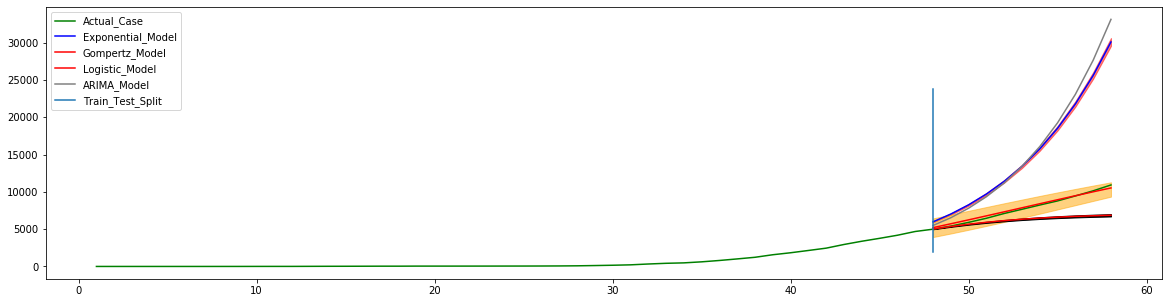

In [637]:
plt.figure(figsize=(20,5))
plt.plot(df_Bangladesh["Days"],df_Bangladesh["Total_Confirmed"],c='g',label="Actual_Case")
plt.plot(test_case_expo["Days"],test_case_expo["Total_Confirmed"],c='b',label="Exponential_Model")
plt.plot(test_case_gompertz["Days"],test_case_gompertz["Total_Confirmed"],c='r',label="Gompertz_Model")
plt.plot(test_case_logistic["Days"],test_case_logistic["Total_Confirmed"],c='r',label="Logistic_Model",alpha=1)
plt.plot(test_case_ARIMA["Days"],test_case_ARIMA["Total_Confirmed"],c='grey',label="ARIMA_Model",alpha=1)

plt.fill_between(test["Days"],pred_upper_expo,pred_lower_expo,color='red',alpha=0.5)
plt.fill_between(test["Days"],pred_upper_gompertz,pred_lower_gompertz,color='orange',alpha=0.5)
plt.fill_between(test["Days"],pred_upper_logistic,pred_lower_logistic,color='black',alpha=1)


plt.axvline(test_case.Days[0], ymin=0.1, ymax=0.7,label = 'Train_Test_Split')
plt.legend()


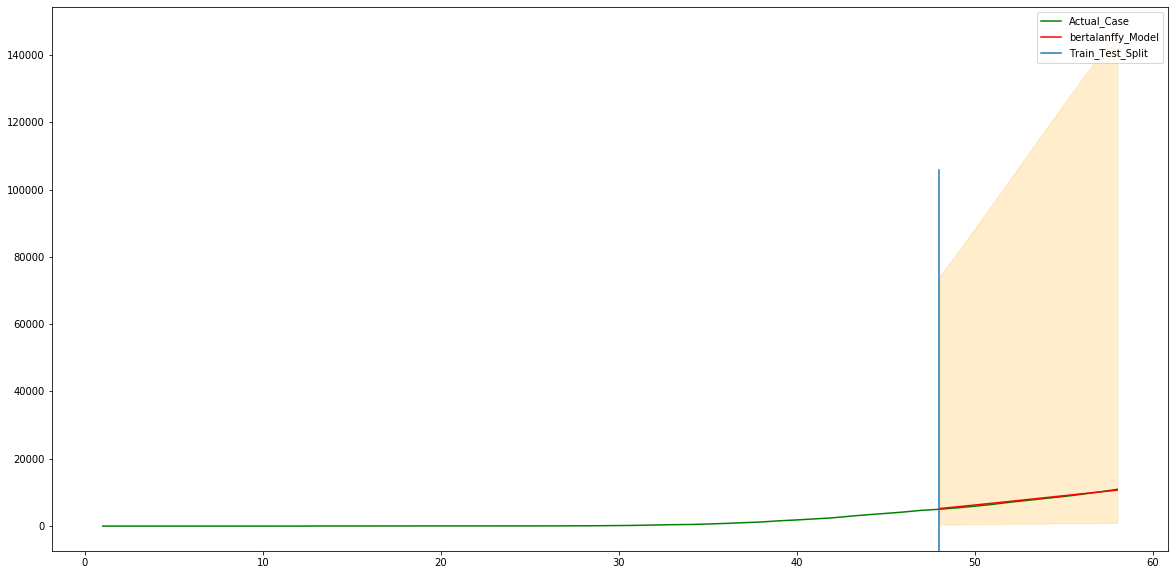

In [638]:
plt.figure(figsize=(20,10))
plt.plot(df_Bangladesh["Days"],df_Bangladesh["Total_Confirmed"],c='g',label="Actual_Case")

plt.plot(test_case_bertalanffy["Days"],test_case_bertalanffy["Total_Confirmed"],c='r',label="bertalanffy_Model",alpha=1)
plt.fill_between(test["Days"],pred_upper_bertalanffy,pred_lower_bertalanffy,color='orange',alpha=0.2)
plt.axvline(test_case.Days[0], ymin=0, ymax=0.7,label = 'Train_Test_Split')
plt.legend()